
# GDP per capita and its effect on the man life quality: Gapminder datasaet Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

My objective is to identify the impact of [GDP](https://en.wikipedia.org/wiki/Gross_domestic_product) growth on four metrics of human well-being: [Income](https://en.wikipedia.org/wiki/Per_capita_income), [Human Development Index(HDI)](https://en.wikipedia.org/wiki/Human_Development_Index) and [Life Expectancy](https://en.wikipedia.org/wiki/Life_expectancy). In this investigation, I used four datasets from the [Gapminder](https://www.gapminder.org/data/) to identify trends of the change in GDP over time as well as other indicators according to different countries and regions of the world.

All data files are arranged by country and have not region file, for that I doanloaded the region file from [github page](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes).

<a id='intro'></a>
### Step One: Posing Questions
**Research Questions:**

**1-** What is the effect of GDP on Income, Human Development Index(HDI) and Life Expectancy? 

**2-** Are there trends that can be observed between all selected metrics with each other? (correlation matrix)

**3-** What are the distributions of each one of the four metrics chosen according to the countries? and according to time (years)?

**4-** Have certain regions of the world been growing in the four metrics better than others? 

**5-** Have certain sampled countries (for example Egypt, USA, etc ... ) of the world been growing in the four metrics better than others?

**Datasets Files:**
For answering the quesitions above I download the folowing files from Gapminder page:

**1-** GDP file: gdppercapita_us_inflation_adjusted.csv

**2-** Income file: income_per_person_gdppercapita_ppp_inflation_adjusted.csv

**3-** HDI file: human_development_index.csv

**4-** Life Expectancy file: life_expectancy_years.csv

and one file from github for Regions

**5-** World Regions file: world_regions.csv


In [712]:
# Importing statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
### 2nd Step: Data Wrangling

**2-1- Gathering and reading data:**
After getting the files which from gapminder and github sites I uploaded it to the project folder to read can read in the next cells.

In [713]:
# read GDP csv data file and make the 'country' column is index
gdp = pd.read_csv('gdppercapita_us_inflation_adjusted.csv', index_col='country')
# confirm and display 5 rows to check
gdp.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0,618.0,618.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0
Algeria,2470.0,2080.0,1630.0,2130.0,2200.0,2280.0,2110.0,2240.0,2410.0,2540.0,...,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0,4830.0,4830.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,43000.0,43900.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0,3580.0,3480.0


In [714]:
# read GDP csv data file and setting the 'country' column is index
hdi = pd.read_csv('human_development_index.csv', index_col='country')
# confirm and display 5 rows to check
hdi.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2107
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,0.338,...,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479,NaN,NaN
Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,0.656,...,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764,NaN,NaN
Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,0.636,...,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,...,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533,NaN,NaN


In [715]:
# read Income csv data file and setting the 'country' column is index
income_per = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv', index_col='country') 
# confirm and display 5 rows to check
income_per.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
Albania,667,667,667,667,667,668,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400
Algeria,715,716,717,718,719,720,721,722,723,724,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
Angola,618,620,623,626,628,631,634,637,640,642,...,5910,5900,5910,6000,6190,6260,6230,6030,5940,5850


In [716]:
# read Life Expectancy csv data file and setting the 'country' column is index
life_exp = pd.read_csv('life_expectancy_years.csv', index_col='country')
# confirm and display 5 rows to check
life_exp.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [717]:
# read 'World Regions' csv data file and setting the 'name' column is index
w_reg = pd.read_csv('world_regions.csv', index_col='name')
# confirm and display 5 rows to check
w_reg.head()

,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
name,,,,,,,,,,
Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


**2-2 Assessing the data and Building Intuition**
Performing some operations to know number of rows and columns in the dataframe using [.shape], also to inspect data types and look for instances of missing or possibly errant data by using [ .info() ] method and calculating descriptive statistics measurements using [.describe()] method 

In [718]:
# to returns a tuple of the dimensions of the dataframes (rows, col.)
gdp.shape, hdi.shape, income_per.shape, life_exp.shape

((190, 58), (187, 28), (193, 219), (187, 219))

In [719]:
# To display a concise summary of the dataframe, 
# including the number of non-null values in each column and the datatype of each col.
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, Afghanistan to Zimbabwe
Data columns (total 58 columns):
1960    88 non-null float64
1961    89 non-null float64
1962    89 non-null float64
1963    89 non-null float64
1964    89 non-null float64
1965    93 non-null float64
1966    96 non-null float64
1967    97 non-null float64
1968    99 non-null float64
1969    99 non-null float64
1970    108 non-null float64
1971    108 non-null float64
1972    108 non-null float64
1973    108 non-null float64
1974    110 non-null float64
1975    114 non-null float64
1976    115 non-null float64
1977    120 non-null float64
1978    120 non-null float64
1979    121 non-null float64
1980    132 non-null float64
1981    136 non-null float64
1982    138 non-null float64
1983    138 non-null float64
1984    140 non-null float64
1985    141 non-null float64
1986    144 non-null float64
1987    147 non-null float64
1988    149 non-null float64
1989    150 non-null float64
1990    161 non-null floa

In [720]:
# To display a concise summary of the dataframe, 
# including the number of non-null values in each column and the datatype of each col.
hdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 28 columns):
1990    143 non-null float64
1991    143 non-null float64
1992    143 non-null float64
1993    143 non-null float64
1994    143 non-null float64
1995    147 non-null float64
1996    147 non-null float64
1997    147 non-null float64
1998    147 non-null float64
1999    150 non-null float64
2000    167 non-null float64
2001    167 non-null float64
2002    167 non-null float64
2003    169 non-null float64
2004    172 non-null float64
2005    181 non-null float64
2006    181 non-null float64
2007    181 non-null float64
2008    181 non-null float64
2009    181 non-null float64
2010    187 non-null float64
2011    187 non-null float64
2012    187 non-null float64
2013    187 non-null float64
2014    187 non-null float64
2015    187 non-null float64
2016    0 non-null float64
2107    0 non-null float64
dtypes: float64(28)
memory usage: 42.4+ KB


In [721]:
# To display a concise summary of the dataframe, 
# including the number of non-null values in each column and the datatype of each col.
income_per.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: int64(219)
memory usage: 331.7+ KB


In [722]:
# To display a concise summary of the dataframe, 
# including the number of non-null values in each column and the datatype of each col.
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 321.4+ KB


In [723]:
# To display a concise summary of the dataframe, 
# including the number of non-null values in each column and the datatype of each col.
w_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
alpha-2                     248 non-null object
alpha-3                     249 non-null object
country-code                249 non-null int64
iso_3166-2                  249 non-null object
region                      248 non-null object
sub-region                  248 non-null object
intermediate-region         107 non-null object
region-code                 248 non-null float64
sub-region-code             248 non-null float64
intermediate-region-code    107 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 21.4+ KB


In [724]:
# Investigating the data by calculating the statistical measurements on it using [.describe()] method 
gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,88.000000,89.000000,89.000000,89.000000,89.000000,93.000000,96.000000,97.000000,99.000000,99.000000,...,187.000000,187.000000,190.000000,187.000000,186.000000,186.000000,186.000000,185.000000,184.000000,183.000000
mean,4622.500000,4740.325843,4883.808989,5044.146067,5298.224719,5331.537634,5355.604167,5469.247423,5769.626263,6070.545455,...,13096.508021,12494.850267,13966.078947,12787.668449,12904.198925,12987.623656,13155.446237,13380.529730,13579.945652,13861.781421
std,6259.530721,6474.995954,6668.398816,6881.558232,7284.774644,7401.639525,7497.344196,7705.354775,7986.131163,8434.129299,...,19030.226639,17930.998978,22366.413612,18167.977557,18000.075075,18028.891032,18253.648558,18648.762614,18890.299898,19122.670759
min,159.000000,141.000000,132.000000,142.000000,163.000000,176.000000,164.000000,150.000000,164.000000,166.000000,...,230.000000,230.000000,231.000000,234.000000,236.000000,239.000000,243.000000,227.000000,218.000000,213.000000
25%,711.000000,711.000000,712.000000,708.000000,698.000000,763.000000,750.750000,737.000000,757.500000,767.000000,...,1320.000000,1340.000000,1400.000000,1465.000000,1562.500000,1635.000000,1680.000000,1760.000000,1830.000000,1960.000000
50%,1485.000000,1480.000000,1490.000000,1460.000000,1550.000000,1680.000000,1685.000000,1650.000000,1690.000000,1780.000000,...,4620.000000,4550.000000,4670.000000,4940.000000,5390.000000,5615.000000,5590.000000,5660.000000,5800.000000,5810.000000
75%,5147.500000,5540.000000,5380.000000,5330.000000,5710.000000,6040.000000,5655.000000,5700.000000,6405.000000,6850.000000,...,14800.000000,13850.000000,13650.000000,13900.000000,14000.000000,14450.000000,14850.000000,14900.000000,15250.000000,15700.000000
max,27100.000000,27900.000000,27900.000000,28600.000000,30500.000000,29900.000000,30000.000000,30300.000000,31200.000000,34100.000000,...,109000.000000,102000.000000,144000.000000,105000.000000,102000.000000,104000.000000,107000.000000,108000.000000,109000.000000,108000.000000


In [725]:
# Investigating the data by calculating the statistical measurements on it using [.describe()] method 
gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,88.000000,89.000000,89.000000,89.000000,89.000000,93.000000,96.000000,97.000000,99.000000,99.000000,...,187.000000,187.000000,190.000000,187.000000,186.000000,186.000000,186.000000,185.000000,184.000000,183.000000
mean,4622.500000,4740.325843,4883.808989,5044.146067,5298.224719,5331.537634,5355.604167,5469.247423,5769.626263,6070.545455,...,13096.508021,12494.850267,13966.078947,12787.668449,12904.198925,12987.623656,13155.446237,13380.529730,13579.945652,13861.781421
std,6259.530721,6474.995954,6668.398816,6881.558232,7284.774644,7401.639525,7497.344196,7705.354775,7986.131163,8434.129299,...,19030.226639,17930.998978,22366.413612,18167.977557,18000.075075,18028.891032,18253.648558,18648.762614,18890.299898,19122.670759
min,159.000000,141.000000,132.000000,142.000000,163.000000,176.000000,164.000000,150.000000,164.000000,166.000000,...,230.000000,230.000000,231.000000,234.000000,236.000000,239.000000,243.000000,227.000000,218.000000,213.000000
25%,711.000000,711.000000,712.000000,708.000000,698.000000,763.000000,750.750000,737.000000,757.500000,767.000000,...,1320.000000,1340.000000,1400.000000,1465.000000,1562.500000,1635.000000,1680.000000,1760.000000,1830.000000,1960.000000
50%,1485.000000,1480.000000,1490.000000,1460.000000,1550.000000,1680.000000,1685.000000,1650.000000,1690.000000,1780.000000,...,4620.000000,4550.000000,4670.000000,4940.000000,5390.000000,5615.000000,5590.000000,5660.000000,5800.000000,5810.000000
75%,5147.500000,5540.000000,5380.000000,5330.000000,5710.000000,6040.000000,5655.000000,5700.000000,6405.000000,6850.000000,...,14800.000000,13850.000000,13650.000000,13900.000000,14000.000000,14450.000000,14850.000000,14900.000000,15250.000000,15700.000000
max,27100.000000,27900.000000,27900.000000,28600.000000,30500.000000,29900.000000,30000.000000,30300.000000,31200.000000,34100.000000,...,109000.000000,102000.000000,144000.000000,105000.000000,102000.000000,104000.000000,107000.000000,108000.000000,109000.000000,108000.000000


In [726]:
# Investigating the data by calculating the statistical measurements on it using [.describe()] method 
income_per.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,947.782383,948.269430,951.217617,950.911917,952.772021,953.202073,954.305699,953.979275,950.911917,952.202073,...,16176.362694,16444.284974,16704.450777,16866.336788,17010.549223,17210.398964,17432.849741,17611.383420,17908.181347,18241.502591
std,508.348372,506.753967,516.692581,511.552526,518.974690,513.492023,514.667191,508.132446,490.318368,492.600302,...,18502.994709,18769.943218,19098.612186,18943.430768,18867.547829,18911.747174,19122.183694,19162.954535,19383.636509,19664.365483
min,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,588.000000,609.000000,614.000000,616.000000,598.000000,602.000000,623.000000,625.000000,627.000000,629.000000
25%,608.000000,608.000000,608.000000,609.000000,609.000000,609.000000,610.000000,610.000000,610.000000,611.000000,...,3120.000000,3280.000000,3370.000000,3430.000000,3300.000000,3270.000000,3290.000000,3390.000000,3520.000000,3670.000000
50%,847.000000,847.000000,847.000000,847.000000,848.000000,848.000000,849.000000,850.000000,850.000000,851.000000,...,9560.000000,9920.000000,10100.000000,10300.000000,10500.000000,10800.000000,11000.000000,11300.000000,11600.000000,12100.000000
75%,1100.000000,1100.000000,1110.000000,1110.000000,1110.000000,1120.000000,1120.000000,1130.000000,1130.000000,1140.000000,...,22100.000000,21800.000000,22700.000000,23000.000000,23200.000000,24000.000000,24100.000000,24300.000000,24900.000000,25500.000000
max,4230.000000,4160.000000,4390.000000,4300.000000,4500.000000,4240.000000,4270.000000,3910.000000,3480.000000,3430.000000,...,117000.000000,125000.000000,129000.000000,125000.000000,123000.000000,121000.000000,120000.000000,118000.000000,120000.000000,121000.000000


In [727]:
# Investigating the data by calculating the statistical measurements on it using [.describe()] method 
life_exp.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,184.000000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,70.001070,70.225668,70.659358,71.05615,71.399465,71.622995,71.933690,72.206952,72.422283,72.658152
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,8.832102,9.050710,8.439841,8.18101,7.996165,7.889169,7.605557,7.414169,7.331040,7.252807
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,45.400000,32.100000,47.500000,47.90000,48.000000,48.400000,49.600000,50.300000,50.800000,51.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,63.400000,63.900000,64.300000,65.00000,65.350000,65.550000,66.050000,66.650000,66.900000,67.100000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,72.500000,72.600000,72.700000,72.80000,72.900000,73.000000,73.300000,73.500000,73.700000,74.050000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,76.600000,76.700000,76.900000,77.00000,77.200000,77.350000,77.500000,77.650000,77.825000,78.025000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,82.700000,82.800000,82.900000,83.20000,83.400000,83.600000,83.800000,83.900000,84.000000,84.200000


**2-3 Cleaning Data**
I'll drop (trim) all the dataframes to equal my selected period (1990 - 2015) in the number of rows and columns, then execlude the null values by filling cells by the mean value  of each row. After that I'll search about duplicated data (rows) and drop it if found. For preparing the data frames to the 3rd step (Exploratory Data Analysis), I'll merge and group the necessary dataframes as shown in the next cells.

In [728]:
# Drope extraneous columns befor and after the time interval (years) which started 1990 and 2015
gdp.drop(gdp.iloc[:, :30], axis=1, inplace=True)
gdp.drop(['2016', '2017'], axis=1, inplace=True)
# confirm and display 5 rows to check
gdp.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,398.0,440.0,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0
Albania,1950.0,1380.0,1290.0,1420.0,1550.0,1760.0,1940.0,1740.0,1910.0,2180.0,...,3380.0,3610.0,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0
Algeria,3550.0,3420.0,3400.0,3260.0,3160.0,3220.0,3300.0,3280.0,3400.0,3460.0,...,4280.0,4360.0,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0
Andorra,35800.0,35300.0,34300.0,32800.0,32600.0,32900.0,34200.0,37300.0,38600.0,40000.0,...,49700.0,48700.0,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0
Angola,2050.0,2010.0,1830.0,1350.0,1320.0,1480.0,1630.0,1700.0,1730.0,1720.0,...,2740.0,3260.0,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0


In [729]:
# Drope extraneous columns after the time interval (years) which started 1990 and 2015
hdi.drop(['2016', '2107'], axis=1, inplace=True)
# confirm and display 5 rows to check
hdi.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,0.338,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,0.656,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,0.636,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [730]:
# Drope extraneous columns befor and after the time interval (years) which started 1990 and 2015
income_per.drop(income_per.iloc[:, 0:190],  axis=1, inplace=True)
income_per.drop(['2016', '2017', '2018'], axis=1, inplace=True)
# confirm and display 5 rows to check
income_per.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1040,1030,950,818,732,881,904,930,956,982,...,1160,1290,1300,1530,1610,1660,1840,1810,1780,1750
Albania,4560,3230,3010,3320,3620,4130,4530,4070,4460,5100,...,7920,8450,9150,9530,9930,10200,10400,10500,10700,11000
Algeria,10200,9870,9820,9400,9130,9300,9510,9460,9800,9970,...,12300,12600,12700,12600,12900,13000,13200,13300,13500,13700
Andorra,28400,28000,27200,26000,25900,26100,27200,29700,30800,31900,...,42700,43400,41400,41700,39000,42000,41900,43700,44900,46600
Angola,4390,4210,3790,2760,2770,2970,3210,3370,3500,3510,...,4600,5440,5980,5910,5900,5910,6000,6190,6260,6230


In [731]:
# Drope extraneous columns befor and after the time interval (years) which started 1990 and 2015
life_exp.drop(life_exp.iloc[:, 0:190], axis=1, inplace=True)
life_exp.drop(['2016', '2017', '2018'], axis=1, inplace=True)
# confirm and display 5 rows to check
life_exp.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,51.6,51.3,51.4,51.4,50.7,51.1,51.4,51.1,50.1,51.5,...,54.1,54.6,55.2,55.7,56.2,56.7,57.2,57.7,57.8,57.9
Albania,73.9,73.9,73.9,73.9,74.0,74.1,74.3,72.5,74.3,74.4,...,75.2,75.4,75.6,75.9,76.3,76.7,77.0,77.2,77.4,77.6
Algeria,71.0,71.4,71.7,72.0,72.1,72.3,72.8,73.0,73.1,73.5,...,75.6,75.9,76.1,76.3,76.5,76.7,76.8,77.0,77.1,77.3
Andorra,79.5,79.5,79.6,79.8,80.0,80.3,80.6,81.0,81.3,81.5,...,82.5,82.7,82.7,82.7,82.7,82.6,82.6,82.6,82.6,82.5
Angola,50.2,50.8,51.0,49.7,51.1,52.0,52.3,52.7,52.8,52.9,...,57.0,57.8,58.6,59.3,60.1,60.9,61.7,62.5,63.3,64.0


In [732]:
# first: Drope extraneous columns befor 'region' column.
w_reg.drop(w_reg.iloc[:, :4], axis=1, inplace=True)
# confirm and display 5 rows to check
w_reg.head()

,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
name,,,,,,
Afghanistan,Asia,Southern Asia,NaN,142.0,34.0,NaN
Åland Islands,Europe,Northern Europe,NaN,150.0,154.0,NaN
Albania,Europe,Southern Europe,NaN,150.0,39.0,NaN
Algeria,Africa,Northern Africa,NaN,2.0,15.0,NaN
American Samoa,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [733]:
# Second: Drope extraneous columns after 'region' column.
w_reg.drop(w_reg.iloc[:, 1:], axis=1, inplace=True)
# confirm and display 5 rows to check
w_reg.head()

,region
name,
Afghanistan,Asia
Åland Islands,Europe
Albania,Europe
Algeria,Africa
American Samoa,Oceania


In [734]:
# Using mean value of each row to fill in missing values in the same row 
country_mean = gdp.mean(axis=1)
for i, col in enumerate(gdp):
       gdp.iloc[:, i] = gdp.iloc[:, i].fillna(country_mean)
# confirm correction 
gdp.isnull().any().any()

False

Last code is taken from [Stackoverflow](https://stackoverflow.com/questions/33058590/pandas-dataframe-replacing-nan-with-row-average)

In [735]:
# Using mean value of each row to fill in missing values in the same row 
country_mean = hdi.mean(axis=1)
for i, col in enumerate(hdi):
       hdi.iloc[:, i] = hdi.iloc[:, i].fillna(country_mean)
# confirm correction 
hdi.isnull().any().any()

False

In [736]:
# Using mean value of each row to fill in missing values in the same row 
country_mean = income_per.mean(axis=1)
for i, col in enumerate(income_per):
       income_per.iloc[:, i] = income_per.iloc[:, i].fillna(country_mean)
# confirm correction 
income_per.isnull().any().any()

False

In [737]:
# Using mean value of each row to fill in missing values in the same row 
country_mean = life_exp.mean(axis=1)
for i, col in enumerate(life_exp):
       life_exp.iloc[:, i] = life_exp.iloc[:, i].fillna(country_mean)
# confirm correction 
life_exp.isnull().any().any()

False

In [738]:
# Finding duplicated data (rows) 
sum(gdp.duplicated())

0

In [739]:
# Finding duplicated data (rows) 
sum(hdi.duplicated())

0

In [740]:
# Finding duplicated data (rows) 
sum(income_per.duplicated())

0

In [741]:
# Finding duplicated data (rows) 
sum(life_exp.duplicated())

0

**Merging dataframes to get the mean by country** taken from the 4 files in one dataframe to take data of countries found in it (next three steps) and merge it with 'world region' dataframe to add the region column.

In [742]:
# first: Finding the mean for the four metrics for each country (row) and put it in df
gdp_mean_country = gdp.mean(axis=1)
gdp_mean_country = gdp_mean_country.to_frame()
# Displaying few rows to confirm
gdp_mean_country.head()

,0
country,
Afghanistan,495.642857
Albania,2855.000000
Algeria,3909.615385
Andorra,40069.230769
Angola,2443.076923


In [743]:
# Second: rename the 0 col. to "GDP" (gdp_mean_country)
gdp_mean_country.rename(columns={0: 'GDP'}, inplace=True)
# Confirming rename
gdp_mean_country.head()

,GDP
country,
Afghanistan,495.642857
Albania,2855.000000
Algeria,3909.615385
Andorra,40069.230769
Angola,2443.076923


**I'll repeat the steps in prevous two cells in the next three dataframes (HDI, Income, Life Expectancy).**

In [744]:
hdi_mean_country = hdi.mean(axis=1)
hdi_mean_country = hdi_mean_country.to_frame()
hdi_mean_country.rename(columns={0: 'HDI'}, inplace=True)

In [745]:
income_per_mean_country = income_per.mean(axis=1)
income_per_mean_country = income_per_mean_country.to_frame()
income_per_mean_country.rename(columns={0: 'Income/Person'}, inplace=True)

In [746]:
life_exp_mean_country = life_exp.mean(axis=1)
life_exp_mean_country = life_exp_mean_country.to_frame()
life_exp_mean_country.rename(columns={0: 'Life Expectancy'}, inplace=True)

In [747]:
# Merging the four dataframes in one dataframe containing the mean for each country
merged_data_country = gdp_mean_country
merged_data_country = pd.merge(merged_data_country, hdi_mean_country, left_index=True, right_index = True)
merged_data_country = pd.merge(merged_data_country, life_exp_mean_country, left_index=True, right_index = True)
merged_data_country = pd.merge(merged_data_country, income_per_mean_country, left_index=True, right_index = True)
# Next variable (merged_data_not_region) will be used in line chart visualization 
merged_data_without_region = merged_data_country
# Confirm merging
merged_data_country.head(200)

,GDP,HDI,Life Expectancy,Income/Person
country,,,,
Afghanistan,495.642857,0.382808,53.492308,1198.307692
Albania,2855.000000,0.682654,75.042308,6791.153846
Algeria,3909.615385,0.663346,74.446154,11279.230769
Andorra,40069.230769,0.841000,81.638462,35173.076923
Angola,2443.076923,0.462765,55.750000,4376.153846
Antigua and Barbuda,11969.230769,0.782182,75.550000,18826.923077
Argentina,8643.461538,0.772769,74.488462,15738.461538
Armenia,2246.192308,0.670231,71.934615,4677.307692
Australia,45573.076923,0.905423,80.180769,36300.000000


In [748]:
# Merging with 'World Regions' dataframe to add region column 
merged_data_country = pd.merge(merged_data_country, w_reg, left_index=True, right_index = True)
# Confirm merging
merged_data_country.head()

,GDP,HDI,Life Expectancy,Income/Person,region
Afghanistan,495.642857,0.382808,53.492308,1198.307692,Asia
Albania,2855.000000,0.682654,75.042308,6791.153846,Europe
Algeria,3909.615385,0.663346,74.446154,11279.230769,Africa
Andorra,40069.230769,0.841000,81.638462,35173.076923,Europe
Angola,2443.076923,0.462765,55.750000,4376.153846,Africa


In [749]:
# Grouping the dataframe by region
region = merged_data_country.groupby(['region']).mean() 
# Confirm grouping
region.head()

,GDP,HDI,Life Expectancy,Income/Person
region,,,,
Africa,2159.717785,0.469934,58.928679,4627.469900
Americas,8157.893899,0.691008,73.062997,11706.631300
Asia,11148.231062,0.655503,70.146351,18656.734714
Europe,28189.644220,0.809190,76.387443,27927.567873
Oceania,10365.128205,0.656701,67.224786,10048.162393


**Merging dataframes to get the mean by year** taken from the 4 files in one dataframe to take data of the years found in all the 4 dataframes (next three steps) and merging it to get one merged dataframe.

In [750]:
# first: Finding the mean for the four metrics for each year (column) and put it in df
gdp_mean_year = gdp.mean()
gdp_mean_year = gdp_mean_year.to_frame()
# Displaying few rows to confirm
gdp_mean_year.head()

,0
1990,11109.726369
1991,11102.896896
1992,11091.534703
1993,11108.945000
1994,11248.775144


In [751]:
# Second: rename the 0 col. to "GDP" (gdp_mean_year)
gdp_mean_year.rename(columns={0: 'GDP'}, inplace=True)
# Confirming rename
gdp_mean_year.head()

,GDP
1990,11109.726369
1991,11102.896896
1992,11091.534703
1993,11108.945000
1994,11248.775144


**I'll repeat the steps in prevous two cells in the next three dataframes (HDI, Income, Life Expectancy).**

In [752]:
hdi_mean_year = hdi.mean()
hdi_mean_year = hdi_mean_year.to_frame()
hdi_mean_year.rename(columns={0: 'HDI'}, inplace=True)
hdi_mean_year.head()

,HDI
1990,0.599156
1991,0.600830
1992,0.602610
1993,0.605664
1994,0.608995


In [753]:
income_per_mean_year = income_per.mean()
income_per_mean_year = income_per_mean_year.to_frame()
income_per_mean_year.rename(columns={0: 'Income/Person'}, inplace=True)
income_per_mean_year.head()

,Income/Person
1990,12045.932642
1991,11805.652850
1992,11849.248705
1993,11863.082902
1994,12058.181347


In [754]:
life_exp_mean_year = life_exp.mean()
life_exp_mean_year = life_exp_mean_year.to_frame()
life_exp_mean_year.rename(columns={0: 'Life Expectancy'}, inplace=True)
life_exp_mean_year.head()

,Life Expectancy
1990,66.193048
1991,66.281818
1992,66.381818
1993,66.370588
1994,66.253476


In [755]:
# Merging the four dataframes in one dataframe containing the mean for each year
merged_data_year = gdp_mean_year
merged_data_year = pd.merge(merged_data_year, hdi_mean_year, left_index=True, right_index = True)
merged_data_year = pd.merge(merged_data_year, life_exp_mean_year, left_index=True, right_index = True)
merged_data_year = pd.merge(merged_data_year, income_per_mean_year, left_index=True, right_index = True)
# Confirm merging
merged_data_year.head()

,GDP,HDI,Life Expectancy,Income/Person
1990,11109.726369,0.599156,66.193048,12045.932642
1991,11102.896896,0.600830,66.281818,11805.652850
1992,11091.534703,0.602610,66.381818,11849.248705
1993,11108.945000,0.605664,66.370588,11863.082902
1994,11248.775144,0.608995,66.253476,12058.181347


In [756]:
# Merging sample countries in one dataframe and 
# Transpose operation is used to flip the rows with columns
egypt_df = merged_data_without_region.loc["Egypt"].to_frame().T
sa_df = merged_data_without_region.loc["South Africa"].to_frame().T
ger_df = merged_data_without_region.loc["Germany"].to_frame().T
uae_df = merged_data_without_region.loc["United Arab Emirates"].to_frame().T
chi_df = merged_data_without_region.loc["China"].to_frame().T
usa_df = merged_data_without_region.loc['United States'].to_frame().T
uk_df = merged_data_without_region.loc["United Kingdom"].to_frame().T
brazil_df = merged_data_without_region.loc["Brazil"].to_frame().T
aus_df = merged_data_without_region.loc["Australia"].to_frame().T


**The code from** https://pandas.pydata.org/pandas-docs/stable/merging.html

In [757]:
# Concatenating data of the last cell in one dataframe to be visualized
# Insert the sample countries dataframes in a list to be concatenated
frames = [egypt_df, sa_df, ger_df, uae_df, chi_df, usa_df, uk_df, brazil_df, aus_df]
merged_sample_country = pd.concat(frames)
merged_sample_country.head(10)

,GDP,HDI,Life Expectancy,Income/Person
Egypt,2077.307692,0.622615,69.319231,7870.000000
South Africa,6408.461538,0.634923,57.792308,10639.230769
Germany,38750.000000,0.872346,78.334615,37473.076923
United Arab Emirates,53500.000000,0.798500,75.192308,87853.846154
China,2794.538462,0.620577,71.415385,5840.000000
United States,44757.692308,0.892077,77.296154,45665.384615
United Kingdom,35884.615385,0.865462,78.407692,33357.692308
Brazil,9549.230769,0.687538,72.053846,12365.384615
Australia,45573.076923,0.905423,80.180769,36300.000000


<a id='eda'></a>
## 3rd Step: Exploratory Data Analysis

### Research Question 1 :
### What is the effect of GDP on Income, Human Development Index(HDI) and Life expectancy?

**Calculating the correlation between GDP and the other metrics** to show its effect on each of them where the data is calculated **according to year average for all countries.**

In [758]:
merged_data_year.corr()["GDP"].to_frame() 

,GDP
GDP,1.000000
HDI,0.962689
Life Expectancy,0.936365
Income/Person,0.997203


**Scatter plots to visualize the correlation.**

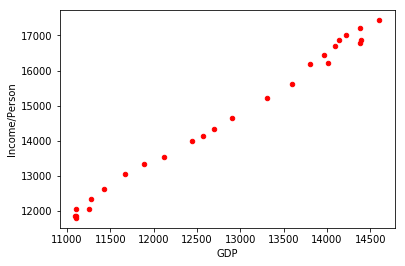

In [759]:
# plot relationship between 'GDP' and 'Income/Person' which = 0.997203 (positive corr., very strong)
merged_data_year.plot(x='GDP', y='Income/Person', kind='scatter', color='r');

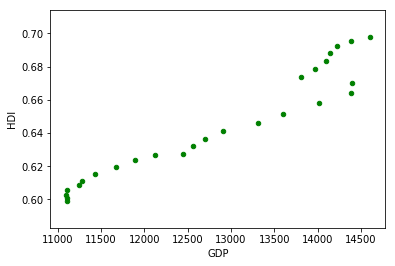

In [760]:
# plot relationship between 'GDP' and 'HDI' which = 0.962689 (positive corr., very strong)
merged_data_year.plot(x='GDP', y='HDI', kind='scatter', color='g');

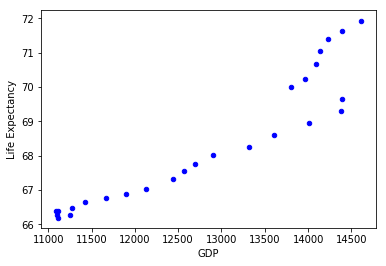

In [761]:
# plot relationship between 'GDP' and 'Life Expectancy' which = 0.936365 (positive corr., strong)
merged_data_year.plot(x='GDP', y='Life Expectancy', kind='scatter', color='b');

**Calculating the correlation between GDP and the other metrics** to show its effect on each of them where the data is calculated **according to countries average for all years.**

In [762]:
merged_data_country.corr()["GDP"].to_frame() 

,GDP
GDP,1.000000
HDI,0.689956
Life Expectancy,0.603767
Income/Person,0.912654


**Scatter plots to visualize the correlation.**

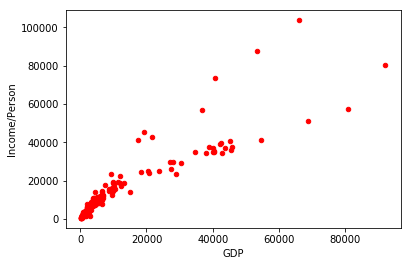

In [763]:
# plot relationship between 'GDP' and 'Income/Person' which = 0.912654 (positive corr., strong)
merged_data_country.plot(x='GDP', y='Income/Person', kind='scatter', color='r');

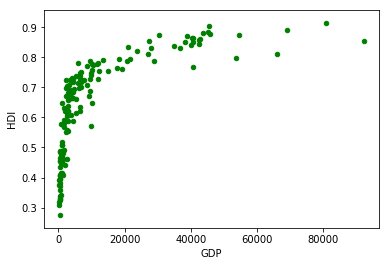

In [764]:
# plot relationship between 'GDP' and 'HDI' which = 0.689956 (weak corr.)
merged_data_country.plot(x='GDP', y='HDI', kind='scatter', color='g');

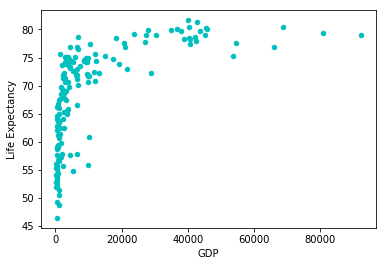

In [765]:
# plot relationship between GDP' and 'Life Expectancy' which = 0.603767 (weak corr.)
merged_data_country.plot(x='GDP', y='Life Expectancy', kind='scatter', color='c');

### Research Question 2  
### Are there trends that can be observed between all selected metrics with each other?)

In [766]:
# The correlation between all metrics on each other according time (years)
merged_data_year.corr()

,GDP,HDI,Life Expectancy,Income/Person
GDP,1.000000,0.962689,0.936365,0.997203
HDI,0.962689,1.000000,0.991441,0.976903
Life Expectancy,0.936365,0.991441,1.000000,0.952900
Income/Person,0.997203,0.976903,0.952900,1.000000


In [767]:
# The correlation between all metrics on each other according countries
merged_data_country.corr()

,GDP,HDI,Life Expectancy,Income/Person
GDP,1.000000,0.689956,0.603767,0.912654
HDI,0.689956,1.000000,0.902818,0.699108
Life Expectancy,0.603767,0.902818,1.000000,0.615644
Income/Person,0.912654,0.699108,0.615644,1.000000


### Research Question 3  
### What are the distributions of each one of the four metrics chosen according to the countries ? and according to time (years)?

**Distributions of each one of the four metrics chosen according to the countries for all years.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43fec2f400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f43feac8c18>]], dtype=object)

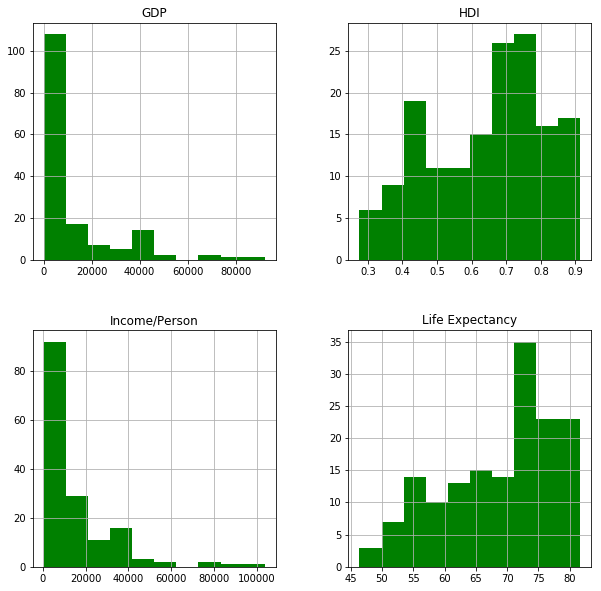

In [768]:
merged_data_country.hist(figsize=(10, 10), color='g')

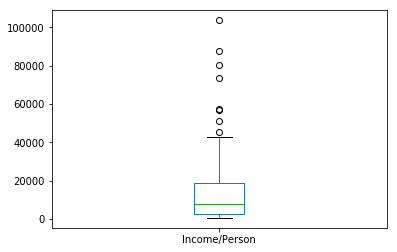

In [769]:
merged_data_country['Income/Person'].plot(kind='box')

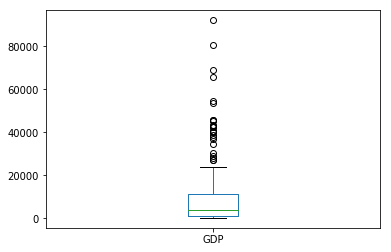

In [770]:
merged_data_country['GDP'].plot(kind='box')

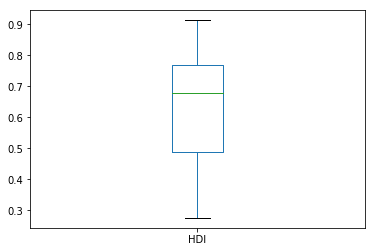

In [771]:
merged_data_country['HDI'].plot(kind='box')

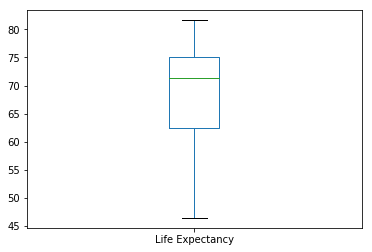

In [772]:
merged_data_country['Life Expectancy'].plot(kind='box')

**Distributions of each one of the four metrics chosen according to the years for all countries.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43fe8fa748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f43fe79cf98>]], dtype=object)

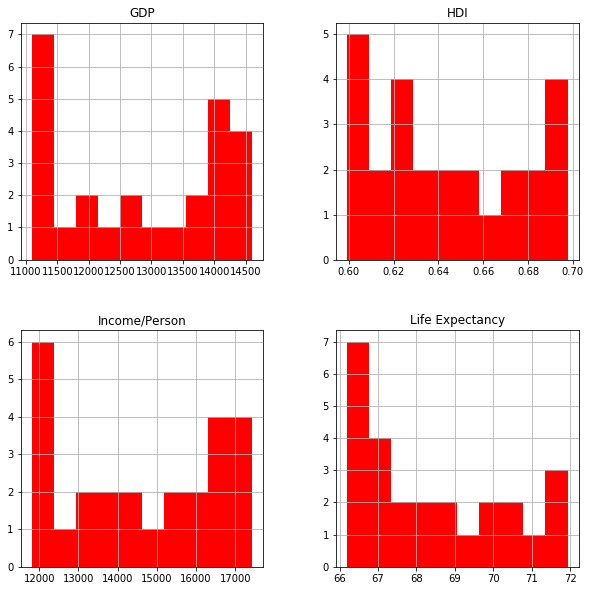

In [773]:
merged_data_year.hist(figsize=(10, 10), color='r', bins=10)

### Research Question 4 
### Have certain regions of the world been growing in the four metrics better than others?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43fe7f8048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f43fe5863c8>], dtype=object)

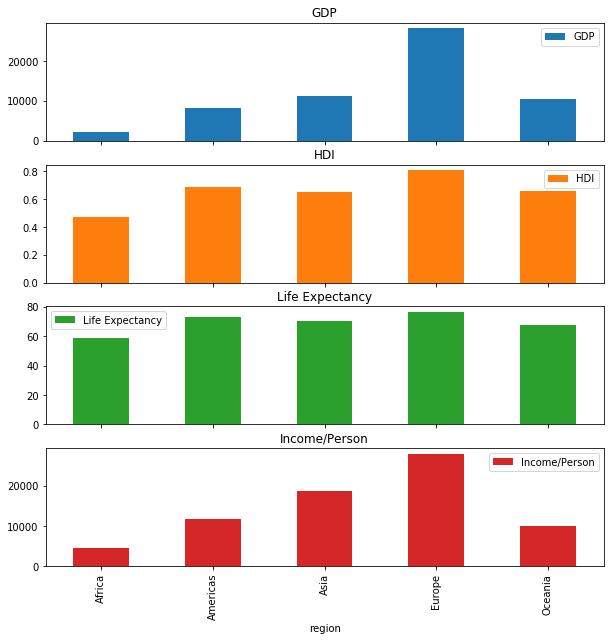

In [774]:
region.plot.bar(figsize=(10, 10),subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43fe55d240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f43fe42e0b8>], dtype=object)

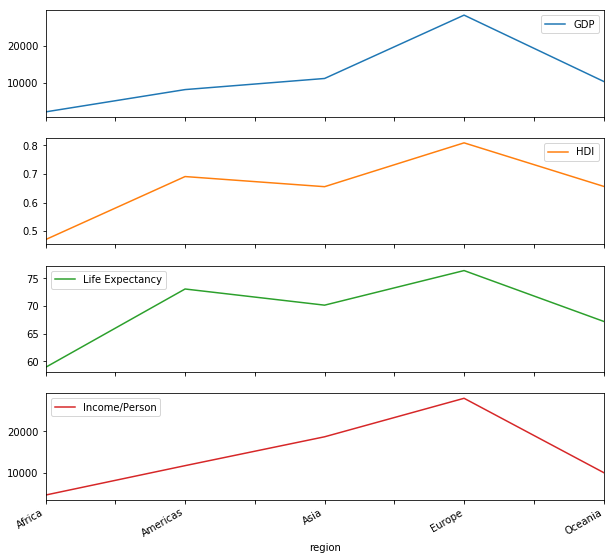

In [775]:
region.plot.line(figsize=(10, 10),subplots=True)

### Research Question 5 
### Have certain sampled countries (for example Egypt,USA, etc ... ) of the world been growing in the four metrics better than others?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43fe418b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f43fe24c4e0>], dtype=object)

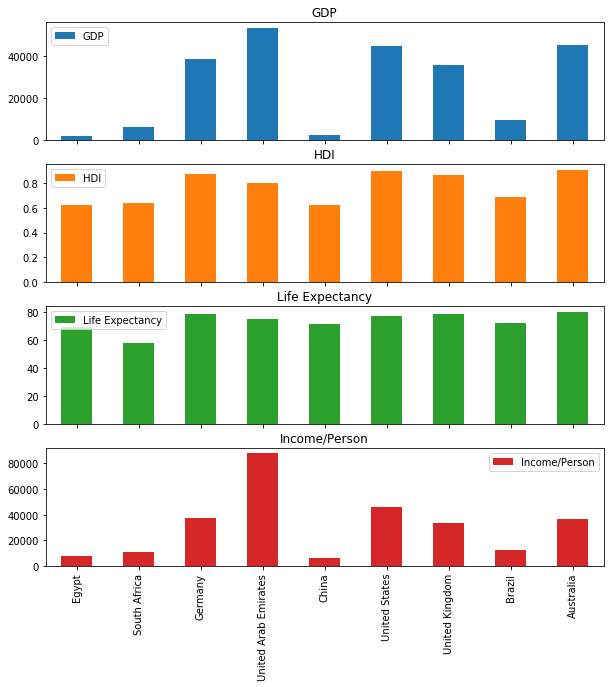

In [776]:
merged_sample_country.plot.bar(figsize=(10, 10),subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43fe190a58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f43fe008a20>], dtype=object)

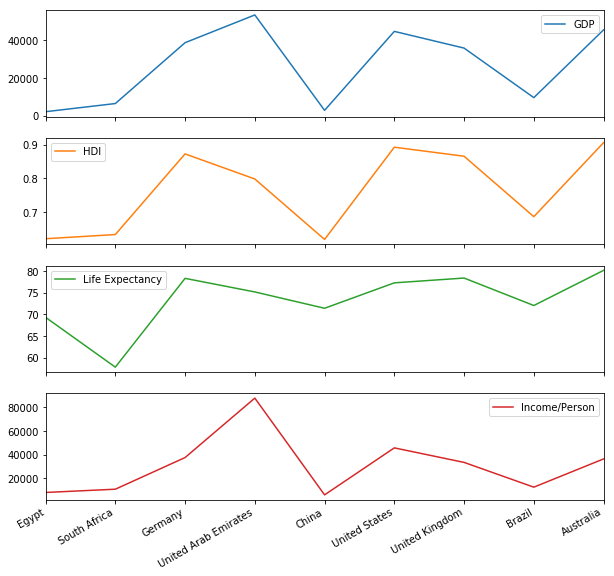

In [777]:
merged_sample_country.plot.line(figsize=(10, 10),subplots=True)

<a id='conclusions'></a>
## Conclusions

**1-**According to years for all countries there is a strong positive correlation between GDP and all the other metrics.  But..  
   
**2-**After calculating the correlation matrix according to countries for all years, I can conclude that GDP and Income are still positive strongly correlated and GDP does not affect the other metrics (no correlation) that appear clearly in GDP with Life Expectancy and GDP with HDI plots.

**3-**Distributions according to years show a righ skewed in GDP and Income that show the most countries are lower in GDP and income(which clearly appears in the GDP and Income boxplots as outliers). However, both HDI and Life Expectancy are almost left skewed in order to these metrics depend on health and education not economic indicators  .

**4-**Europe region is growing in the four metrics over the years and Asia comes after Europe in GDP and Income but Americas come the second in HDI and Life Expectancy and Africa comes in the end of the list of regions in all metrics (as expected)

**5-**According to my selected countries, UAE comes the first in GDP and Income however Australia comes first in HDI and Life Expectancy, but Egypt occupy the last one of the list in GDP and Income as shown in previous bar and line charts.